## Opportunities to identify dissatisfied employees - Analyzing Employee Exit Surveyes
In this project, I have the role of a data analyst. Our stakeholders want to know the following:

1. Are employees who only worked for the institutes (more details below) for a short period of time, resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions I will combine, clean and analyse data from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The most important findings from this analysis:
1. For short termed employements, less than a third are dissatisfied when resigning their job. However, more than half of the veteran employees are dissatisfied when resigning.
2. Resignation is not age dependent.

Based on the results it is therefore the recommendation that the stakeholders should focus on identifying areas of improvement to increase the job satisfaction for experienced and veteran employees.

In [1]:
# Import pandas and NumPy libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # used for plotting results at the end of this project

In [2]:
# Read data
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# Print basic information about dete_survey to better understand the dataset
#dete_survey.info() # Get overview of dataset columns and number of values
dete_survey.head() # Example data from first five rows
dete_survey.isnull().sum() # Used to count number of NaN values in columns

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
# Read basic information about tafe_survey to better understand the dataset
#tafe_survey.info() # Get overview of dataset columns and number of values
tafe_survey.head() # Example data from first five rows
tafe_survey.isnull().sum() # Used to count number of NaN values in columns

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## General data observations & Next Steps
We must first identify the columns nessecary to answer the questions. The questions were: 

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The most important columns to answer these questions are:

(dete_survey dataset)

2   Cease Date                           788 non-null    object   
3   DETE Start Date                      749 non-null    float64   
4   Role Start Date                      724 non-null    float64   
13  Job dissatisfaction                  822 non-null    bool   
14  Dissatisfaction with the department  822 non-null    bool   
15  Physical work environment            822 non-null    bool   
16  Lack of recognition                  822 non-null    bool   
17  Lack of job security                 822 non-null    bool   
18  Work location                        822 non-null    bool   
19  Employment conditions                822 non-null    bool   
25  Work life balance                    822 non-null    bool   
26  Workload                             822 non-null    bool  
49  Gender                               798 non-null    object   
50  Age                                  811 non-null    object  

(tafe_survey dataset)

3 CESSATION YEAR 695 non-null    float64    
4 Reason for ceasing employment 701 non-null    object    
10  Contributing Factors. Dissatisfaction   437 non-null    object    
11  Contributing Factors. Job Dissatisfaction    437 non-null    object   
66  Gender. What is your Gender? 596 non-null    object    
67  CurrentAge. Current Age      596 non-null    object   
70  LengthofServiceOverall. Overall Length of Service at Institute (in years)              596 non-null    object 

In the following I will therefore focus my attention on the above mentioned columns. Thus many of the columns are droped in the following code block.

In [5]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Identifying common column names
Because we eventually want to combine the data, we'll have to standardize the column names.

For dete_survey_updated we use the following criteria to update the column names:
1. Make all the capitalization lowercase.
2. Remove any trailing whitespace from the end of the strings.
3. Replace spaces with underscores ('_').

For tafe_survey_updated we use the following criteria to update the column names:
1. 'Record ID': 'id'
2. 'CESSATION YEAR': 'cease_date'
3. 'Reason for ceasing employment': 'separationtype'
4. 'Gender. What is your Gender?': 'gender'
5. 'CurrentAge. Current Age': 'age'
6. 'Employment Type. Employment Type': 'employment_status'
7. 'Classification. Classification': 'position'
8. 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 9. 'institute_service'
10. 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [6]:
# updating column names in preparation for combining the data
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

new_column_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(new_column_dict, axis = 1, inplace = True)

In [7]:
# Inspect new column names (dete_survey)
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
# Inspect new column names (tafe_survey)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Isolating Resignation Data
Since we are only interested in resignations. We will isolate the values related to this parameter in the following code blocks.

In [9]:
#dete_survey_updated['separationtype'].value_counts() # Used to identify the number of resignations
#tafe_survey_updated['separationtype'].value_counts() # Used to identify the number of resignations

In [10]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation-')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy() #Specifying na to be False instead of NaN replaces NaN values with False.

## Identifying inconsistencies in dates
In the following code block I check for date inconsistencies. This is used to quantify the length om employment and thus the experience of the employee.

I also employ a regex syntax to isolate, extract and convert dates to numeric (float) values.

In [11]:
# dete_resignations['cease_date'].value_counts() # Used to identify unique date values in cease_date column

In [12]:
pattern = r"([2][0-9]{3})" #setup regex pattern for years in range 2000 - 2999
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype('float')

In [13]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False) # Used to make sure that the dates have been extracted correctly.

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [14]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False) # Used to make sure that the dates have been extracted correctly.

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [15]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False) # Used to make sure that the dates have been extracted correctly.

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

## Data Observations - On date and resignation type and Next Steps
From inspection of the cease dates we can verify:

1. There aren't any major issues with the years.
2. The years in each dataframe don't span quite the same number of years.

In the following code block I will create a new column in the dete_survey dataset called 'institute_service' which already exists in the tafe_survey dataset. This column will contain the duration of employment in the respective datasets.

Afterwards I will isolate and combine dissatisfaction identifiers mentioned earlier. I will create a new column in both datasets called 'dissatisfied' which will contain a boolean or a NaN (Not a Number) value:

Boolean logic used:   
True: indicates a person resigned because they were dissatisfied with the job   
False: indicates a person resigned because of a reason other than dissatisfaction with the job   
NaN: indicates the value is missing

In [16]:
# Calculating the employement duration
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [17]:
# Identifying information from the dissatisfaction columns.
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
# Based on the observations in the previous code block
# I create a simple function to update the dissatisfaction values to boolean values
def update_vals(value):
    if value == '-':
        return False
    elif (pd.isnull(value)):
        return np.nan
    else:
        return True

In [19]:
# Working on tafe_survey dataset to identify and combine dissatisfaction factors
factors = ['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']
tafe_resignations[factors] = tafe_resignations[factors].applymap(update_vals) # apply function on all relevant columns
tafe_resignations['dissatisfied'] = tafe_resignations[factors].any(axis=1, skipna=False) # Utilize any method on all dissatisfaction factors. A new (boolean) column is created with the combined dissatisfaction factors.

In [20]:
# Working on dete_survey dataset to identify and combine dissatisfaction factors
factors = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied'] = dete_resignations[factors].any(axis = 1, skipna = False) # Utilize any method on all dissatisfaction factors. A new (boolean) column is created with the combined dissatisfaction factors.

In [21]:
# Create a copy of the results into new variable names.
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Next steps - Combining datasets
I am now ready to combine the two datasets. Our end goal is to aggregate the data according to the institute_service column in order to answer the initial questions. In the following I will 

1. Create a new column called DETE and TAFE to distinqusih between the data sets. 
2. Then I will combine the datasets.

In [22]:
# Create a new column in each dataset. The new column will be used to distinquish between the two in the combined dataset.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine the two dataframes into one
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
# combined.notnull().sum().sort_values()

# Drop any columns (axis=1) with less than 500 NaN values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

## Data Observations and Next Steps
Before doing any analysis we need to clean up the institute_service column.

To analyze the data, I need to convert the numbers from this column into categories. I will base my analysis on: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

I will use the definitions below:

New: Less than 3 years at a company   
Experienced: 3-6 years at a company   
Established: 7-10 years at a company  
Veteran: 11 or more years at a company

In [23]:
# 1. extract the years of service from each value in the institute_service column
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# 2. Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [24]:
# I define a function that maps each year value to one of the career stages defined above
def career_stage(value):
    if value > 11:
        return 'Veteran'
    elif value >= 7:
        return 'Established'
    elif value >= 3:
        return 'Experienced'
    elif pd.isnull(value):
        return np.nan
    else:
        return 'New'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        106
Established     92
Name: service_cat, dtype: int64

In [25]:
# Confirm number of True, False and NaN values in 'dissatisfied' column
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

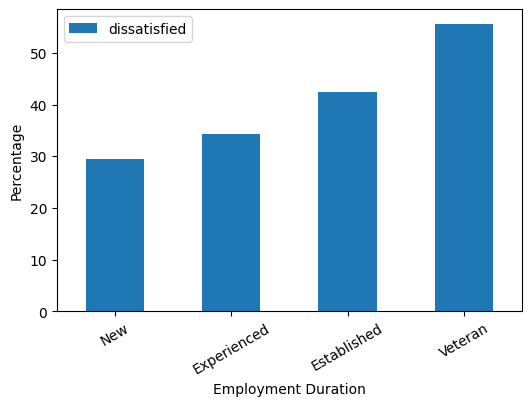

In [26]:
# Replace NaN values with False based on most frequent value above
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = 100*combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Reindexing the Columns to make the final plot a bit nicer to read
dis_pct = dis_pct.reindex(index = ['New', 'Experienced', 'Established', 'Veteran'])
# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)
plt.ylabel('Percentage')
plt.xlabel('Employment Duration')
plt.show()

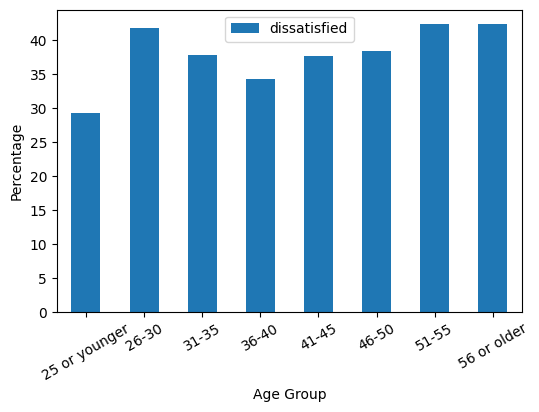

In [27]:
# Define function to help clean up age groups
def age_group(value):
    if value in ['21  25', '21-25', '20 or younger']:
        return '25 or younger'
    elif value in ['26-30', '26  30']:
        return '26-30'
    elif value in ['31-35', '31  35']:
        return '31-35'
    elif value in ['36-40', '36  40']:
        return '36-40'
    elif value in ['41-45', '41  45']:
        return '41-45'
    elif value in ['46-50', '46  50']:
        return '46-50'
    elif value in ['51-55']:
        return '51-55'
    elif value in ['56 or older', '56-60', '61 or older']:
        return '56 or older'

# Apply the age_group function to dataset
combined_updated['age_group'] = combined_updated['age'].apply(age_group)

dis_pct_age = 100*combined_updated.pivot_table(index='age_group', values='dissatisfied')
%matplotlib inline
dis_pct_age.plot(kind='bar', rot=30)
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.show()

## Conclusions
The initial goal of this project was to:

1. Determine if short or long termed employees are more likely to resign due to some kind of dissatisfaction.
2. Determine if a dissatisfied resignation is age dependent.

The most important findings from this analysis is that:
1. For short termed employements, less than a third are dissatisfied when resigning their job. More than half of the veteran employees are dissatisfied when resigning.
2. Resignation is not age dependent according to https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage and confirmed by this analysis.